## [Problem 1] Feature selection for practice

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [35]:
pd_train = pd.read_csv('train.csv') 
variable = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]

In [36]:
variable.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## [Problem 2] Estimation and evaluation by linear regression

In [37]:
X = variable.loc[:, ["GrLivArea","YearBuilt"]]
y = variable["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_transform, y_train)
reg_pred = reg.predict(X_test_transform)
print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2725908099.0636377


### by using scatter plot to create a graph that allow us to compare the actual data with the predicted results

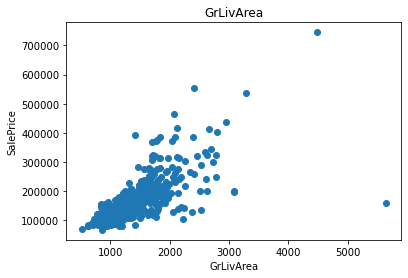

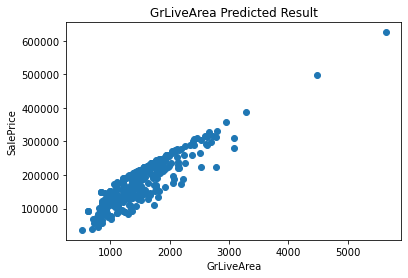

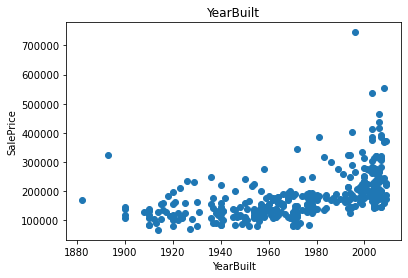

In [29]:
plt.scatter(X_test.loc[:, 'GrLivArea'], y_test, label='actual')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:,'GrLivArea'],reg_pred, label='predicted')
plt.title('GrLiveArea Predicted Result')
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], y_test)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

## [Problem 3] Comparison of methods

Estimate, evaluate and visualize

- Linear regression
- SVM,
- Decision tree
- Random forest)

Linear Regression
MSE: 2758055463.706388


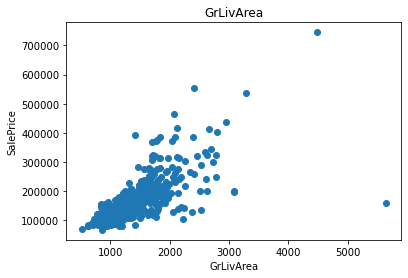

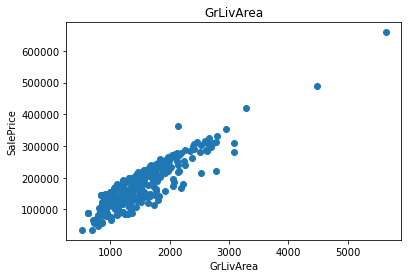

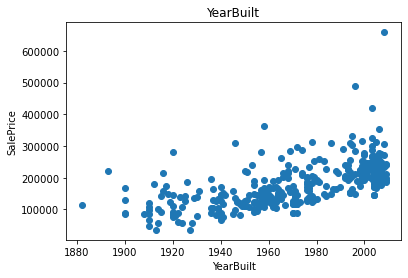

**************************************************
SVM
MSE: 3999979118.8356166


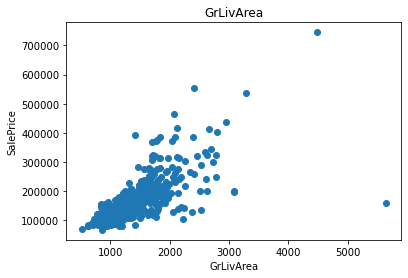

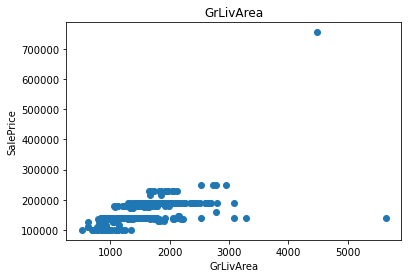

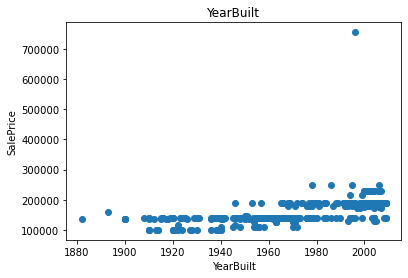

**************************************************
Decision tree
MSE: 3378553173.7780824


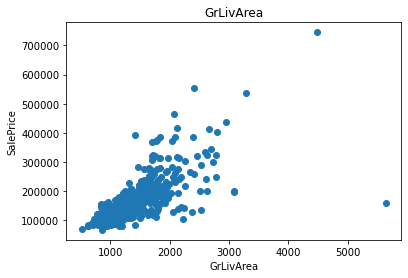

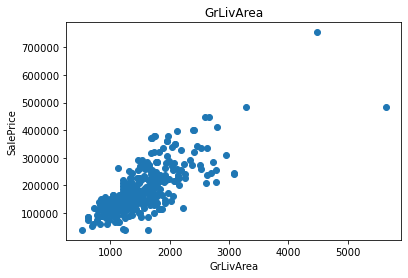

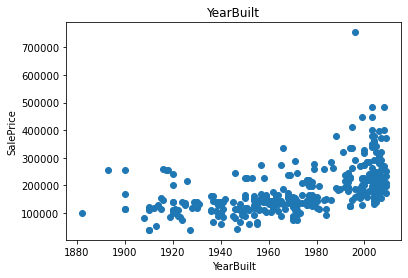

**************************************************
Random Forest
MSE: 4561748385.958904


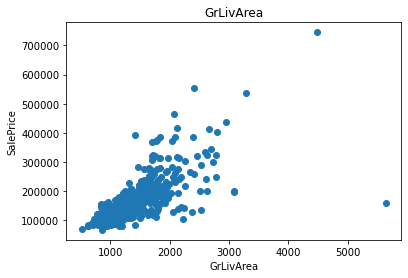

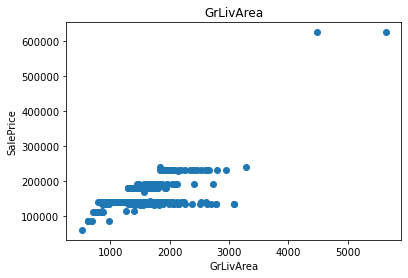

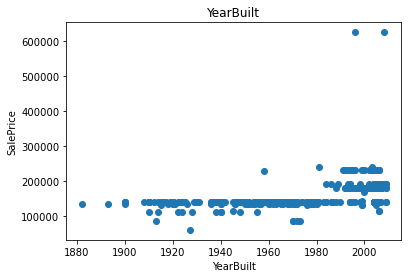

**************************************************


In [38]:
mSE_results = []
model_names = []

def display_outputs(title,y_prediction):
    mse = mean_squared_error(y_true=y_test, y_pred=y_prediction)
    mSE_results.append(mse)
    model_names.append(title)
    print(title)
    print("MSE:", mse)
    plt.scatter(X_test.loc[:, 'GrLivArea'], y_test, label='actual') 
    plt.title('GrLivArea') 
    plt.xlabel('GrLivArea') 
    plt.ylabel('SalePrice') 
    plt.show()
    
    plt.scatter(X_test.loc[:, 'GrLivArea'], y_prediction)
    plt.title('GrLivArea')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.show()

    plt.scatter(X_test.loc[:, 'YearBuilt'], y_prediction)
    plt.title('YearBuilt')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.show()
    print("*"*50)

reg = LinearRegression().fit(X_train_trans, y_train)
reg_pred = reg.predict(X_test_trans)
display_outputs('Linear Regression', reg_pred)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_trans, y_train)

clf_pred = clf.predict(X_test_trans)
display_outputs('SVM', clf_pred)
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(X_train_trans, y_train)
dTC_pred = dTC.predict(X_test_trans)
display_outputs('Decision tree', dTC_pred)
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(X_train_trans, y_train)
rFC_pred = rFC.predict(X_test_trans)
display_outputs('Random Forest', rFC_pred)


In [39]:
pd.DataFrame(mSE_results, index=model_names, columns=['MSE'])

,MSE
Linear Regression,2.758055e+09
SVM,3.999979e+09
Decision tree,3.378553e+09
Random Forest,4.561748e+09


## [Problem 4] (Advance assignment) Learning using other features

In [40]:
pd_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
variable = pd_train[["GrLivArea","YearBuilt", "SalePrice", "LotArea", "YrSold"]]

X = variable.loc[:, ["GrLivArea","YearBuilt", "LotArea", "YrSold"]]
y = variable["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_trans, y_train)

reg_pred = reg.predict(X_test_trans)

print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2758055463.706388
